
Production Decline Curve Analysis (DCA) ===


Enter number of data points:  5
Enter time (months) for point 1:  0
Enter production rate (bbl/day) for point 1:  1000
Enter time (months) for point 2:  6
Enter production rate (bbl/day) for point 2:  800
Enter time (months) for point 3:  12
Enter production rate (bbl/day) for point 3:  600
Enter time (months) for point 4:  18
Enter production rate (bbl/day) for point 4:  450
Enter time (months) for point 5:  24
Enter production rate (bbl/day) for point 5:  350

Enter forecast period (months):  36



 Exponential Decline Rate (D): 0.0437 per month | R²: 0.9962
 Hyperbolic Decline Rate (D): 0.0575 per month | b: 0.5 | R²: 0.9719
 Harmonic Decline Rate (D): 0.0774 per month | R²: 0.9228

 Best fit model based on R²: Exponential

 EUR (Exponential): 0.64 million bbl
 EUR (Hyperbolic): 0.67 million bbl
 EUR (Harmonic, to limit 5 bopd): 0.68 million bbl


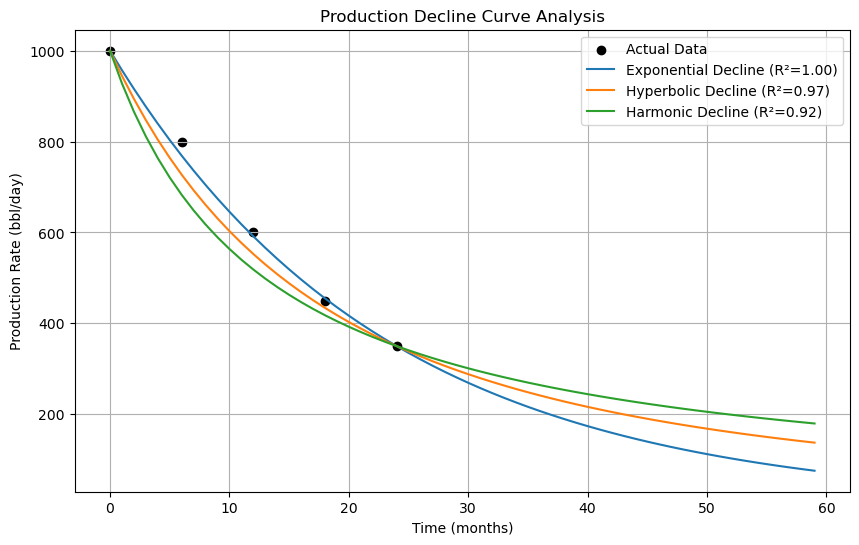

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

print("\nProduction Decline Curve Analysis (DCA) ===")

# 1. User inputs
n = int(input("Enter number of data points: "))

time = []
rate = []

for i in range(n):
    t = float(input(f"Enter time (months) for point {i+1}: "))
    q = float(input(f"Enter production rate (bbl/day) for point {i+1}: "))
    time.append(t)
    rate.append(q)

time = np.array(time)
rate = np.array(rate)

forecast_period = float(input("\nEnter forecast period (months): "))

# 2. Calculate decline rate 'D' for each model
q_i = rate[0]
q_end = rate[-1]
t_end = time[-1]

# Exponential
D_exp = -np.log(q_end / q_i) / t_end
q_exp = q_i * np.exp(-D_exp * time)
# Hyperbolic (assume b=0.5)
b = 0.5
D_hyp = ((q_i / q_end) ** b - 1) / (b * t_end)
q_hyp = q_i / (1 + b * D_hyp * time) ** (1/b)
# Harmonic (b=1)
D_harm = (q_i / q_end - 1) / t_end
q_harm = q_i / (1 + D_harm * time)

# 3. Calculate R² for each model
def r_squared(y_actual, y_pred):
    ss_res = np.sum((y_actual - y_pred) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    return 1 - (ss_res / ss_tot)

R2_exp = r_squared(rate, q_exp)
R2_hyp = r_squared(rate, q_hyp)
R2_harm = r_squared(rate, q_harm)

print(f"\n Exponential Decline Rate (D): {D_exp:.4f} per month | R²: {R2_exp:.4f}")
print(f" Hyperbolic Decline Rate (D): {D_hyp:.4f} per month | b: {b} | R²: {R2_hyp:.4f}")
print(f" Harmonic Decline Rate (D): {D_harm:.4f} per month | R²: {R2_harm:.4f}")

# 4. Determine best-fit model
R2_values = {'Exponential': R2_exp, 'Hyperbolic': R2_hyp, 'Harmonic': R2_harm}
best_fit_model = max(R2_values, key=R2_values.get)

print(f"\n Best fit model based on R²: {best_fit_model}")

# 5. Forecast
t_forecast = np.arange(0, t_end + forecast_period, 1)
q_exp_forecast = q_i * np.exp(-D_exp * t_forecast)
q_hyp_forecast = q_i / (1 + b * D_hyp * t_forecast) ** (1/b)
q_harm_forecast = q_i / (1 + D_harm * t_forecast)

# 6. EURs
EUR_exp = integrate.simpson(q_exp_forecast, t_forecast) * 30.44 * (10)**(-6)
EUR_hyp = integrate.simpson(q_hyp_forecast, t_forecast) * 30.44 * (10)**(-6)
EUR_harm = integrate.simpson(q_harm_forecast, t_forecast) * 30.44 * (10)**(-6)
economic_limit = 5  # bbl/day


print(f"\n EUR (Exponential): {EUR_exp:.2f} million bbl")
print(f" EUR (Hyperbolic): {EUR_hyp:.2f} million bbl")
print(f" EUR (Harmonic, to limit {economic_limit} bopd): {EUR_harm:.2f} million bbl")

# 7. Plot all curves
plt.figure(figsize=(10,6))
plt.scatter(time, rate, color='black', label='Actual Data')
plt.plot(t_forecast, q_exp_forecast, label=f'Exponential Decline (R²={R2_exp:.2f})')
plt.plot(t_forecast, q_hyp_forecast, label=f'Hyperbolic Decline (R²={R2_hyp:.2f})')
plt.plot(t_forecast, q_harm_forecast, label=f'Harmonic Decline (R²={R2_harm:.2f})')
plt.xlabel("Time (months)")
plt.ylabel("Production Rate (bbl/day)")
plt.title("Production Decline Curve Analysis")
plt.legend()
plt.grid(True)
plt.show()
     